In [1]:
%load_ext rpy2.ipython

In [67]:
%%R
# loading R packages
library(phyloseq)
library(ggplot2)
library(plyr)

In [55]:
%%R
physeq = import_biom("../data/otu_table_tax_no211_meta.biom", treefilename = "../data/ssu-aln.bacteria.mask.tre",
                    parseFunction = parse_taxonomy_greengenes)

In [56]:
%%R
myTaxa = c("OTU.909","OTU.542","OTU.456","OTU.2734")
mini = prune_taxa(myTaxa, physeq)
mini

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 4 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4 tips and 3 internal nodes ]


In [66]:
%%R
sample_data(mini)

Sample Data:        [119 samples by 5 sample variables]:
     Plants DayAmdmt Amdmt ID Day
S009      1       01     1  D   0
S204      1       21     1  D   2
S112      0       11     1  B   1
S247      0       22     2  F   2
S026      0       00     0  A   0
S023      1       00     0  C   0
S201      0       20     0  A   2
S133      1       10     0  C   1
S103      1       10     0  C   1
S012      0       01     1  B   0
S134      1       11     1  D   1
S108      1       10     0  C   1
S207      0       21     1  B   2
S123      1       10     0  C   1
S202      0       21     1  B   2
S031      0       00     0  A   0
S106      0       10     0  A   1
S233      1       20     0  C   2
S013      1       00     0  C   0
S007      0       01     1  B   0
S139      1       11     1  D   1
S126      0       10     0  A   1
S208      1       20     0  C   2
S122      0       11     1  B   1
S022      0       01     1  B   0
S223      1       20     0  C   2
S113      1       10     

In [58]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
physeq_snorm = transform_sample_counts(physeq, function(x) x / sum(x))

In [88]:
%%R
myTaxa = c("OTU.909","OTU.542","OTU.456","OTU.2734")
mini = prune_taxa(myTaxa, physeq_snorm)
mini

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 4 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4 tips and 3 internal nodes ]


In [89]:
%%R
mini.df<-psmelt(mini)

cdata <- ddply(mini.df, c("Day", "Amdmt","OTU"), summarise,
               N    = length(Abundance),
               mean = mean(Abundance),
               sd   = sd(Abundance),
               se   = sd / sqrt(N)
)
cdata
# Get summary of all samples

   Day Amdmt      OTU  N         mean           sd           se
1    0     0 OTU.2734 16 2.494014e-06 9.976057e-06 2.494014e-06
2    0     0  OTU.456 16 4.326711e-05 3.755312e-05 9.388281e-06
3    0     0  OTU.542 16 4.226503e-06 1.182770e-05 2.956925e-06
4    0     0  OTU.909 16 6.828608e-05 5.499562e-05 1.374890e-05
5    0     1 OTU.2734 16 0.000000e+00 0.000000e+00 0.000000e+00
6    0     1  OTU.456 16 5.416442e-05 4.668698e-05 1.167174e-05
7    0     1  OTU.542 16 5.514561e-06 1.634504e-05 4.086259e-06
8    0     1  OTU.909 16 5.216670e-05 4.680236e-05 1.170059e-05
9    0     2 OTU.2734  8 6.925591e-06 1.958853e-05 6.925591e-06
10   0     2  OTU.456  8 6.007904e-05 5.681114e-05 2.008577e-05
11   0     2  OTU.542  8 0.000000e+00 0.000000e+00 0.000000e+00
12   0     2  OTU.909  8 9.349714e-05 3.882291e-05 1.372597e-05
13   1     0 OTU.2734 16 3.682519e-06 8.751592e-06 2.187898e-06
14   1     0  OTU.456 16 4.743041e-05 3.945304e-05 9.863261e-06
15   1     0  OTU.542 16 1.343728e-06 3.

geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?
geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


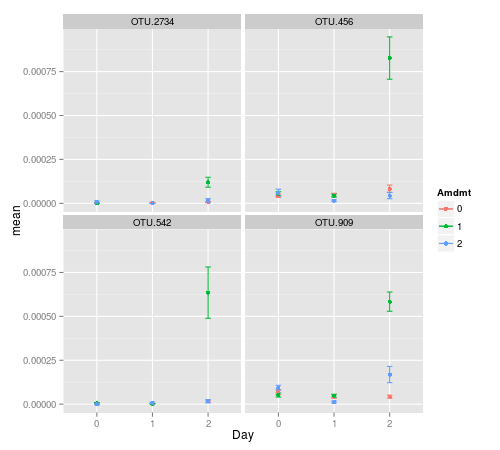

In [91]:
%%R -h 450 -w 500

p = ggplot(cdata, aes(x=Day, y=mean, colour=Amdmt)) + 
    geom_errorbar(aes(ymin=mean-se, ymax=mean+se), width=.1) +
    geom_line() +
    geom_point()
p = p + facet_wrap(~OTU)

p

In [96]:
%%R
physeq.df<-psmelt(physeq_snorm)

cdata.physeq <- ddply(physeq.df, c("Day", "Amdmt","OTU"), summarise,
               N    = length(Abundance),
               mean = mean(Abundance),
               sd   = sd(Abundance),
               se   = sd / sqrt(N)
)
rank(head(cdata.physeq))
highOTUs<-sort(cdata.physeq$mean[cdata.physeq$Amdmt=="2",], TRUE)[c(1:10)]
highOTUs

Error in cdata.physeq$mean[cdata.physeq$Amdmt == "2", ] : 
  incorrect number of dimensions
